# Editing automata

Vcsn provides different means to enter automata.  One, which also applies to  plain Python, is using the `automaton` constructor:

:0: FutureWarning: IPython widgets are experimental and may change in the future.


<IPython.core.display.Javascript object>

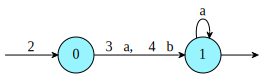

In [1]:
import vcsn
vcsn.automaton('''
context = "lal_char(ab), z
$ -> 0 <2>
0 -> 1 <3>a,<4>b
1 -> 1 a
1 -> $
''', 'daut')

See the documentation of `vcsn.automaton` for more details about this function.  The syntax used to define the automaton is, however, described here.

In order to facilitate the definition of automata, Vcsn provides additional ''magic commands'' to the IPython Notebook. We will see through this guide how use this command.

## `%%automaton`: Entering an Automaton

IPython supports so-called "cell magic-commands", that start with `%%`.  Vcsn provides the `%%automaton` to enter the literal description of an automaton.  For instance, the automaton above can enter as follows:

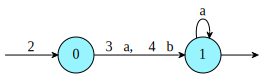

In [2]:
%%automaton a
context = "lal_char(ab), z"
$ -> 0 <2>
0 -> 1 <3>a,<4>b
1 -> 1 a
1 -> $

The first argument, here `a`, is the name of the variable in which this automaton is stored:

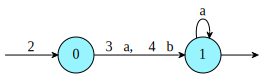

In [3]:
a

The second argument specifies the format in which the automaton is described, defaulting to `daut`:

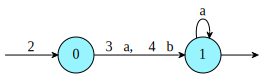

In [4]:
%%automaton a dot
digraph
{
  vcsn_context = "lal_char(ab), z"
  I -> 0 [label = "<2>"]
  0 -> 1 [label = "<3>a,<4>b"]
  1 -> 1 [label = a]
  1 -> F
}

The definition of automata entered this way are persistent: they are stored in the notebook and will be recovered when the page is reopened.

## `%automaton`: Text-Based Edition of an Automaton

In IPython "line magic commands" begin with a single `%`.  The line magic `%automaton` takes three arguments:
1. the name of the automaton
2. the format you want the textual description of the automaton. Defaults to `daut`.
3. the display mode: `h` for horizontal and `v` for vertical. Defaults to `h`.

Contrary to the cell magic, the `%automaton` can be used to update an existing automaton:

In [5]:
%automaton a

AttributeError: 'TextareaWidget' object has no attribute 'set_css'

The real added value is that now you can interactively edit this automaton: changes in the text are immediately propagated on the rendered automaton.

When given a fresh variable name, `%automaton` creates a dummy automaton that you can use as a starting point:

In [6]:
%automaton b fado

AttributeError: 'TextareaWidget' object has no attribute 'set_css'

Beware however that these automata are _not_ persistent: changes will be lost when the notebook is closed.

## Automata Formats

Vcsn supports differents input and output formats.  Some, such as `tikz`, are only export-only formats: they cannot be read by Vcsn.

### daut

This simple format is work in progress: its precise syntax is still subject to changes.  It is roughly a simplification of the `dot` syntax.

### dot

This format relies on the "dot" language of the GraphViz toolkit (http://graphviz.org).

### fado

This is the native language of the FAdo platform (http://fado.dcc.fc.up.pt).

### efsm

This format is designed to support import/export with OpenFST (http://openfst.org): it wraps its multi-file format (one file describes the automaton with numbers as transition labels, and one or several others define these labels) into a single format.  It is not designed to be used by humans, but rather to be handled by two tools:
- `efstcompile` to compile such a file into the OpenFST binary file format,
- `efstdecompile` to extract an `efsm` file from a binary OpenFST file.

### grail

This format is made to exchange automata with the Grail (http://grailplus.org).